In [1]:
import requests
import time
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [2]:
url = "https://old.reddit.com/r/news/top/?sort=top&t=year"
# Headers to mimic a browser visit
headers = {'User-Agent': 'Mozilla/5.0'}

# Returns a requests.models.Response object
page = requests.get(url, headers=headers)
soup = BeautifulSoup(page.text, 'html.parser')

In [3]:
attrs = {'class': 'thing'}
titles = []
likes = []
counter = 1
while counter <= 39:                                                      #number of results pages to be scraped 
    for post in soup.find_all('div', attrs=attrs):
        if post.find("div", attrs={"class": "score likes"}).text == "•":     #omit post if it doesn't have any votes yet
            continue
        if post.find('p', class_="tagline").text.startswith('promoted'):    #omit post if it's an ad (promoted post)
            continue
        titles.append(post.find('p', class_="title").text.split("(",1)[0])  #excluding website name from title
        likes.append(post.find("div", attrs={"class": "score likes"}).text)
    counter += 1
    next_button = soup.find("span", class_="next-button")
    next_page_link = next_button.find("a").attrs['href']
    time.sleep(1)    #pauses running for two seconds to making scraping less taxing on reddit servers
    page = requests.get(next_page_link, headers=headers)
    soup = BeautifulSoup(page.text, 'html.parser')

In [4]:
#splitting titles into list where each word is its own element
Allwords = []
for title in range(len(titles)):
    splitTitle = titles[title].split()
    for word in range(len(titles[title])):
        titles[title][word].lower()
    Allwords.append(splitTitle)

#making words lowercase
for i in range(len(Allwords)):
    for j in range(len(Allwords[i])):
        Allwords[i][j] = Allwords[i][j].lower()

In [38]:
stopWords = stopWords = ['to', 'the', 'a', 'to', 'is', 'and', 'in', 'of', 'that', 'it', 'be','at', 'this', 'are', 'be', 'for', 'will', 
             'with', 'have','on', 'by', '|', 'was', 'has', 'after', 'A', 'as', 'from', 'over', 'who', 'says', 'its',"it's"
            'how', 'his', 'her', 'de', '14:', 'vs', 'new', '-', '–', ':', '85', '$', 'us', 'man', 'not', 'you', 'he', 'up', 
            'more', 'out', 'news', 'you', 'about','first', 'amid', 'an', 'how', 'your', 'than',
             'what', 'edited:', 'post', 'all', 'against', 'during', '2020', '(lans)', 'we', 'but'] #words to exclude 
#title words must contain these letters. words with characters of other languages are excluded
countDict = {}
for i in range(len(Allwords)):
    for j in range(len(Allwords[i])):
        if Allwords[i][j] not in countDict:
            countDict[Allwords[i][j]] = 1
        else:
            countDict[Allwords[i][j]] += 1
counts_sorted = sorted(countDict.items(), key=lambda x: x[1], reverse = True)
final_count = [i for i in counts_sorted if i[0] not in stopWords]         #excluding words in stopWords

In [39]:
x = []   #creating a list of most common words for x-axis data
for word in final_count[:10]:
    x.append(word[0])

y= []    #creating a list of frequency of words for y-axis 
for freq in final_count[:10]:
    y.append(freq[1])

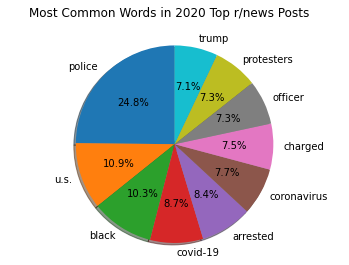

In [40]:
fig1, ax1 = plt.subplots()
ax1.pie(y, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle("Most Common Words in 2020 Top r/news Posts")
plt.show()

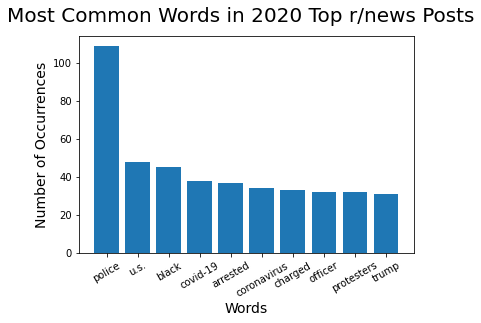

In [41]:
xs = range(len(final_count[:10]))
fig, ax = plt.subplots()
ax.bar(x, y, align = 'center')
ax.xaxis.set_label_text('Words', fontsize = 14)
ax.yaxis.set_label_text('Number of Occurrences', fontsize = 14)
ax.set_xticks(xs)
#rotated xaxis labels and made them smaller so they'd fit
ax.set_xticklabels(x, rotation = 30)
ax.xaxis.set_tick_params(labelsize = 10)
fig.suptitle("Most Common Words in 2020 Top r/news Posts", fontsize = 20)

plt.show()